# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import json
import matplotlib.pyplot
import numpy as np
import seaborn as sns


# Constants

In [4]:
FOLDER_NAME = "ex_3_least_NSGA2"
OBJECTIVES = ["percentage_violations_urban", "percentage_violations_rural"]

FOLDER_PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))), "Simulator", "data", FOLDER_NAME)


# Methods

In [5]:
def load_json(fileName):
    with open(os.path.join(FOLDER_PATH, fileName + ".json"), 'r') as file:
        data = json.load(file)

    return data


In [15]:
def plot_avg_objectives(data):
    matplotlib.pyplot.figure(figsize=(8, 5))

    objective_to_label = {
        "percentage_violations_urban": "$p_{v, urban}$",
        "percentage_violations_rural": "$p_{v, nonurban}$",
    }

    objective_to_color = {
        "percentage_violations_urban": sns.color_palette("Paired")[1],
        "percentage_violations_rural": sns.color_palette("Paired")[3],
    }
    
    # loop through each objective in the list
    for objective in OBJECTIVES:
        # extract the data for the current objective
        objective_data = data[objective]
        
        # calculate the average for each generation
        num_individuals = len(objective_data[0])
        avg_data = [(sum(gen) / num_individuals) * 100 for gen in objective_data]
        
        matplotlib.pyplot.plot(avg_data, color=objective_to_color[objective], label=f'{objective_to_label[objective]}')
    
    title = 'Mean Violation Rates by Generation'
    matplotlib.pyplot.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
    matplotlib.pyplot.xlabel('Generation')
    matplotlib.pyplot.ylabel('$p_{v}$ (%)')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "plots", title + ".png"), dpi=300, bbox_inches='tight')
    matplotlib.pyplot.show()


In [7]:
def heuristic_scatter_plot_objectives(data, objective1_key: str, objective2_key: str, color_scale_key: str = None):
    objective1 = np.array(data[objective1_key]).flatten()
    objective2 = np.array(data[objective2_key]).flatten()

    if color_scale_key is not None:
        color_scale = np.array(data[color_scale_key]).flatten()
    else:
        color_scale = [[i] * len(data[objective1_key][0]) for i in range(len(data[objective1_key]))]
        color_scale_key = "Generation"

    matplotlib.pyplot.figure(figsize=(10, 6))
    scatter = matplotlib.pyplot.scatter(objective1, objective2, c=color_scale, cmap='viridis')
    matplotlib.pyplot.colorbar(scatter, label=color_scale_key.replace("_", " ").title())
    matplotlib.pyplot.xlabel(objective1_key.replace("_", " ").title())
    matplotlib.pyplot.ylabel(objective2_key.replace("_", " ").title())
    matplotlib.pyplot.title('NSGA-II Results Visualization')
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()


In [8]:
def plot_objective_over_generations(data, objective_key: str):
    objective_data = np.array(data[objective_key])
    
    mean_objectives = np.mean(objective_data, axis=1)
    best_objectives = np.min(objective_data, axis=1)
    
    generations = np.arange(len(mean_objectives))
    
    matplotlib.pyplot.figure(figsize=(10, 6))
    
    for gen_index, objectives in enumerate(objective_data):
        gen_array = np.full_like(objectives, gen_index)
        matplotlib.pyplot.scatter(gen_array, objectives, s=0.9, color='red', alpha=0.5, marker='x')

    matplotlib.pyplot.plot(generations, mean_objectives, label='Mean Objective', color='green', linewidth=2)
    
    matplotlib.pyplot.plot(generations, best_objectives, label='Best Objective', color='blue', linestyle='--', linewidth=2)
    
    matplotlib.pyplot.xlabel('Generation')
    matplotlib.pyplot.ylabel(objective_key.replace("_", " ").title())
    matplotlib.pyplot.title(f'Objective Performance Over Generations: {objective_key.replace("_", " ").title()}')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.show()


# Main

In [9]:
nsga2_data = load_json("heuristic_seed=9")

for key, value in nsga2_data.items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
crowding_distance
diversity
front_number
percentage_violations
percentage_violations_rural
percentage_violations_urban


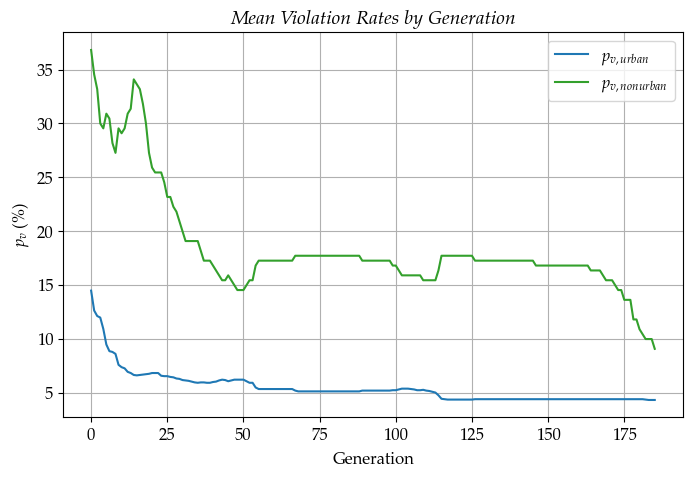

In [16]:
plot_avg_objectives(nsga2_data)


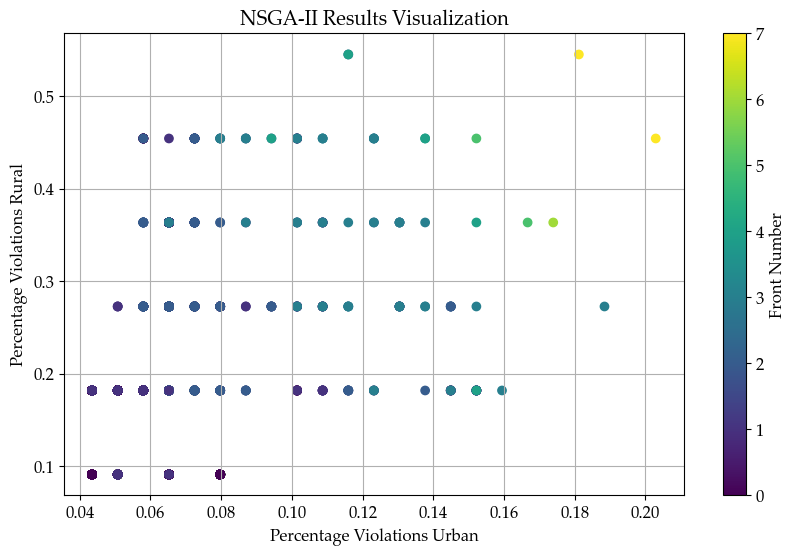

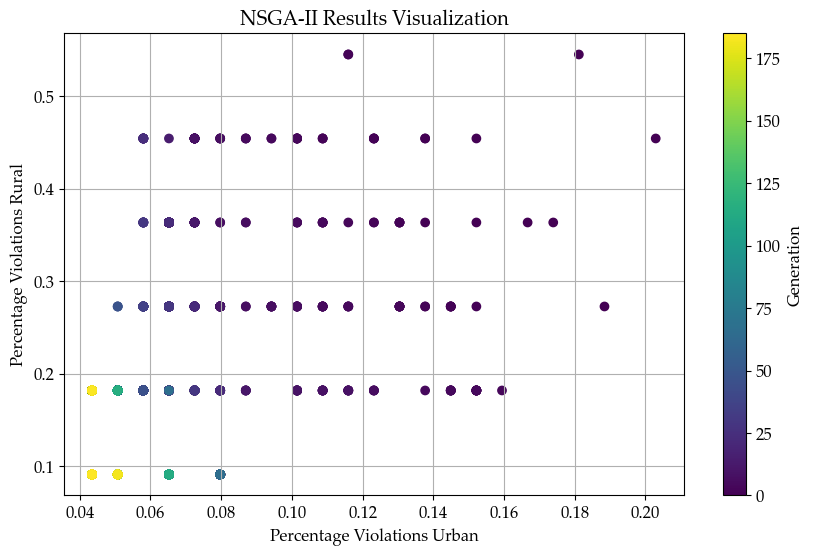

In [11]:
heuristic_scatter_plot_objectives(nsga2_data, OBJECTIVES[0], OBJECTIVES[1], color_scale_key="front_number")

heuristic_scatter_plot_objectives(nsga2_data, OBJECTIVES[0], OBJECTIVES[1], color_scale_key=None)


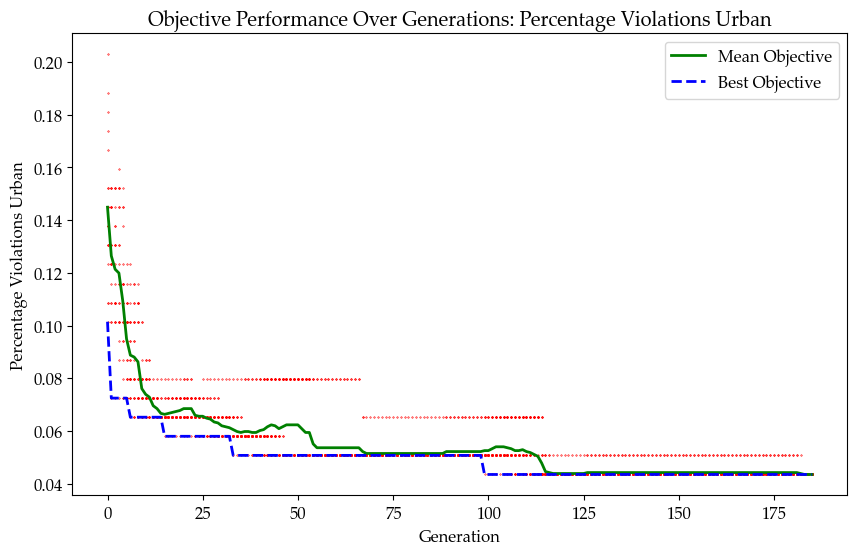

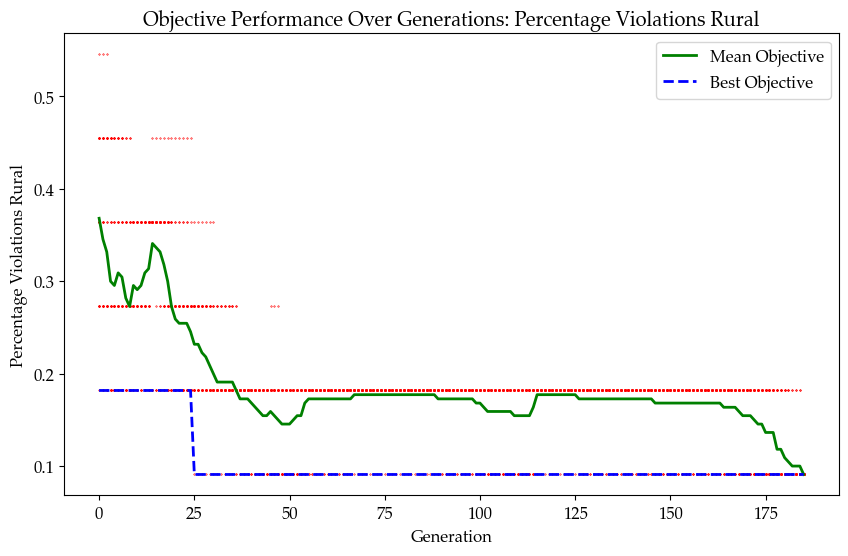

In [12]:
plot_objective_over_generations(nsga2_data, "percentage_violations_urban")
plot_objective_over_generations(nsga2_data, "percentage_violations_rural")
